In [2]:
# IMPORT BASIC LIBS

import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt


%matplotlib inline

In [3]:
# IMPORT DATA

data_raw = pd.read_csv('creditcard.csv')
data_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# SUMMARIZE AND VISUALIZE DATA

#data_raw.describe()

# MESSY --> ISOLATE THE 'AMOUNT & CLASS VARIABLE'

data_relevant = data_raw[['Amount', 'Class', 'Time']] # TIME NOT RELEVANT

data_relevant.describe()


,Amount,Class,Time
count,284807.000000,284807.000000,284807.000000
mean,88.349619,0.001727,94813.859575
std,250.120109,0.041527,47488.145955
min,0.000000,0.000000,0.000000
25%,5.600000,0.000000,54201.500000
50%,22.000000,0.000000,84692.000000
75%,77.165000,0.000000,139320.500000
max,25691.160000,1.000000,172792.000000


In [88]:
# VISUALIZE ALL VARIABLES TO SEE WHICH HAVE MOST VARIANCE

# for column in data_raw.columns:
#     x = data_raw[column]
#     sns.distplot(x, bins = 10, fit=norm)
#     plt.show()


In [5]:
# DESCRIBE DATA

round(data_raw.describe(include='all'),2)




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


<AxesSubplot:xlabel='Class', ylabel='Amount'>

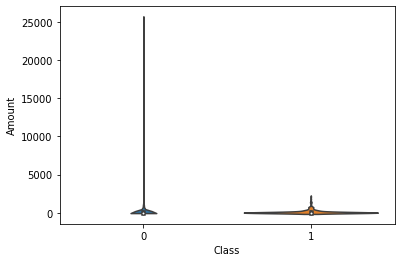

In [14]:
# VISUALIZE DATA

sns.violinplot(data = data_raw, x='Class', y='Amount')


In [6]:
# IMPORT ML LIBS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [20]:
# TRAIN TEST SPLIT 

X = data_raw.iloc[:,1:30]

y = data_raw['Class']

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=.2, random_state=33)

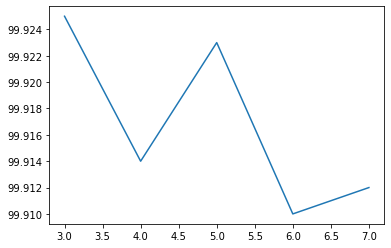

[(7, 99.912), (6, 99.91), (5, 99.923), (4, 99.914), (3, 99.925)]

In [21]:
# FUNCTION TO TEST ACCURACY ACROSS DIFFERENT K-NEIGHBORS

def test_k(min_k, max_k):

    scores_dict = {}
    scores_lst = []
    k_range = list(range(min_k,max_k))
    
    for i in k_range:
        KNN = KNeighborsClassifier(n_neighbors=i)

        KNN_Model = KNN.fit(X_train, y_train)


        KNN_pred = KNN_Model.predict(X_test)

        score = {i : round(accuracy_score(y_test, KNN_pred)*100,3)} 
        
        scores_dict.update(score)

        scores_lst.append(round(accuracy_score(y_test, KNN_pred)*100,3))
    
    plt.plot(k_range,scores_lst)

    plt.show()

    return sorted(scores_dict.items(), reverse= True)

test_k(1,3)


In [25]:
# FIT BEST MODEL

KNN = KNeighborsClassifier(n_neighbors=3)

KNN_Model = KNN.fit(X_train, y_train)


KNN_pred = KNN_Model.predict(X_test)



In [26]:
# FINAL ACCURACY SCORE

round(accuracy_score(y_test, KNN_pred)*100,3)

99.925

In [27]:
# FINAL CONFUSION MATRIX

pd.DataFrame(confusion_matrix(y_test, KNN_pred))

,0,1
0,56851,8
1,35,68


In [30]:
# IMPORT K-MEANS LIB

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN # Density Based

In [36]:
# CREATE KMean MODEL

K_Means = KMeans(
    init = 'k-means++',
    n_clusters = 2, # only 2 outcomes
    n_init = 10,
    max_iter = 100,
    random_state = 66
)

K_Mean_Model = K_Means.fit(X_train, y_train)

K_Mean_pred = K_Mean_Model.predict(X_test)




In [37]:
# FINAL ACCURACY SCORE

round(accuracy_score(y_test, K_Mean_pred)*100,3)

97.93

In [42]:
# FINAL CONFUSION MATRIX


pd.DataFrame(confusion_matrix(y_test, K_Mean_pred))

,0,1
0,55779,1080
1,99,4


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
# CREATE MODEL & FIT

LogR_Model = LogisticRegression()

LogR_Fit = LogR_Model.fit(X_train, y_train)


C:\Users\BennettCelichowski\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# PREDICT

LogR_Pred = LogR_Fit.predict(X_test)


In [64]:
# FINAL ACCURACY SCORE

round(accuracy_score(y_test, LogR_Pred)*100,3)

99.909

In [65]:
# FINAL CONFUSION MATRIX


pd.DataFrame(confusion_matrix(y_test, LogR_Pred))

,0,1
0,56849,10
1,42,61


In [66]:
# STILL CANNOT ID FRAUD WELL -- NEED TO USE PCA TO ELIMINATE ENTROPY

from sklearn.decomposition import PCA



In [83]:
pca_model = PCA(n_components=2, svd_solver='full')
pca_fit = pca_model.fit(X_train)

print(pca_fit.explained_variance_ratio_)



[9.99527283e-01 6.14761872e-05]


In [86]:
# FIT MODEL WITH PCA DATASET


pca_fit_trans = pca_model.fit_transform(X_train)

LOGR_PCA_Fit = LogR_Fit.fit(pca_fit_trans,y_train) 

In [89]:
# PREDICT


LogR_PCA_Pred = LOGR_PCA_Fit.predict(pca_model.fit_transform(X_test))




In [90]:
# CONF. MATRIX --> EVEN WORSE SCORE!

pd.DataFrame(confusion_matrix(y_test, LogR_PCA_Pred))

,0,1
0,56852,7
1,102,1


In [92]:
# TRY SVM

from sklearn import svm



In [93]:
# CREATE MODEL AND FIT


SVM_model = svm.SVC()

SVM_fit = SVM_model.fit(X_train, y_train)


In [94]:
# PREDICT

SVM_pred = SVM_fit.predict(X_test)


In [95]:
pd.DataFrame(confusion_matrix(y_test, SVM_pred))

,0,1
0,56848,11
1,67,36
